# Cavity QED with standing wave feedback

$$\def\ket#1{\left|#1\right\rangle}
\def\timedel#1{\left(\tilde{t}-\tilde{\tau}_{#1}\right)}$$

## Model

A cavity of length $L$ and frequency $\omega_0$ is coupled to the outside world with a semitransparent mirror. The output field is reflected back from a perfectly reflecting mirror at distance $L'$. This induces a time-delayed feedback of the output signal into the cavity in the form

\begin{align}
G_k(t) = G_0\sin{(q_kL)}e^{i(\omega_0-\omega_k)t} = G_0(-1)^ke^{-i\omega_k^\prime t}
\end{align}
where
\begin{align}
\omega_k^\prime &= \frac{(2k+1)\pi}{\tau}\\
\tau &= \frac{2L}{c}
\end{align}

A two level system is interacting with the resonant cavity mode with a coupling strength $\gamma$. 
Everything is considered in the interaction picture, where the Hamiltonian can be expressed as
\begin{align}
H = -\hbar\gamma(\sigma^-a^\dagger + \sigma^+a) - \hbar\sum_{k=0}^\infty\left[G_k(t)a^\dagger d_k + G_k^*(t)d_k^\dagger a\right]
\end{align}

## One-excitation manifold

The considered wave function has the form
$$\ket{\psi}=c_e(t)\ket{e,0,\{0\}}+c_g(t)\ket{g,1,\{0\}}+\sum_kc_{g,k}(t)\ket{g,0,\{k\}}$$

## Equations of motion

\begin{align}
\partial_t c_e &= i\gamma c_g(t)\\
\partial_t c_g &= i\gamma c_e(t) - \underbrace{|G_0|^2\tau}_{2\kappa}\sum_{k=0}^{\infty}(-1)^kc_g(t-k\tau)\Theta(t-k\tau)
\end{align}


In [1]:
#%matplotlib inline
from math import *
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from pydelay import dde23

In [2]:
1/(np.pi)

0.3183098861837907

In [48]:
eqnsST1 = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - 2*kap*(cg-cg(t-tau)*Heavi(t-tau))'
    }

eqnsSTnofb = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - 2*kap*cg'
    }

eqnsSTmany = {
    'ce:c' : '(ii*gam)*cg',
    'cg:c' : '(ii*gam)*ce - kap*4*(0.5*cg+cg(t-tau)*Heavi(t-tau)+cg(t-2*tau)*Heavi(t-2*tau)\
    +cg(t-3*tau)*Heavi(t-3*tau)+cg(t-4*tau)*Heavi(t-4*tau)+cg(t-5*tau)*Heavi(t-5*tau)\
    +cg(t-6*tau)*Heavi(t-6*tau)+cg(t-7*tau)*Heavi(t-7*tau)+cg(t-8*tau)*Heavi(t-8*tau)\
    +cg(t-9*tau)*Heavi(t-9*tau)+cg(t-10*tau)*Heavi(t-10*tau)+cg(t-11*tau)*Heavi(t-11*tau)\
    +cg(t-12*tau)*Heavi(t-12*tau)+cg(t-13*tau)*Heavi(t-13*tau)+cg(t-14*tau)*Heavi(t-14*tau)\
    +cg(t-15*tau)*Heavi(t-15*tau)+cg(t-16*tau)*Heavi(t-16*tau)+cg(t-17*tau)*Heavi(t-17*tau)\
    +cg(t-18*tau)*Heavi(t-18*tau)+cg(t-19*tau)*Heavi(t-19*tau)+cg(t-20*tau)*Heavi(t-20*tau))'
    }
    
paramsST = {
            'gam' : 1.,
            'kap' : 1.000000,
            'tau' : pi/40.
                        }

mycode = """
double Heavi(double t) {
    if(t>=0)
        return 1.0;
    else
        return 0.0;
}
"""

ddeST1 = dde23(eqns=eqnsST1, params=paramsST)
ddeST1.set_sim_params(tfinal=20*paramsST['tau'], dtmax=.001)
ddeSTnofb = dde23(eqns=eqnsSTnofb, params=paramsST)
ddeSTnofb.set_sim_params(tfinal=20*paramsST['tau'], dtmax=.001)
ddeSTmany = dde23(eqns=eqnsSTmany, params=paramsST)
ddeSTmany.set_sim_params(tfinal=20*paramsST['tau'], dtmax=.001)

In [49]:
histfuncST = { 'ce': lambda t: 1,
             'cg': lambda t: 0
             }
ddeST1.hist_from_funcs(histfuncST, 51)
ddeSTnofb.hist_from_funcs(histfuncST, 51)
ddeSTmany.hist_from_funcs(histfuncST, 51)

In [50]:
ddeST1.run()
ddeSTnofb.run()
ddeSTmany.run()

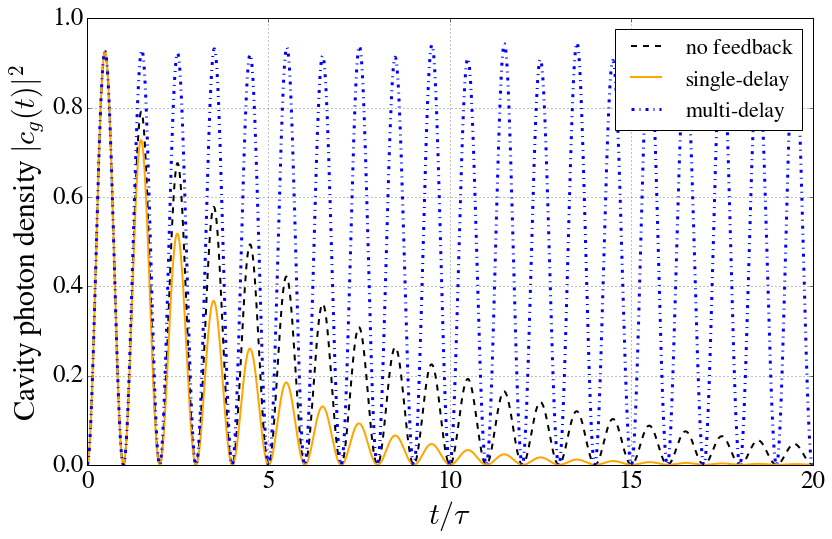

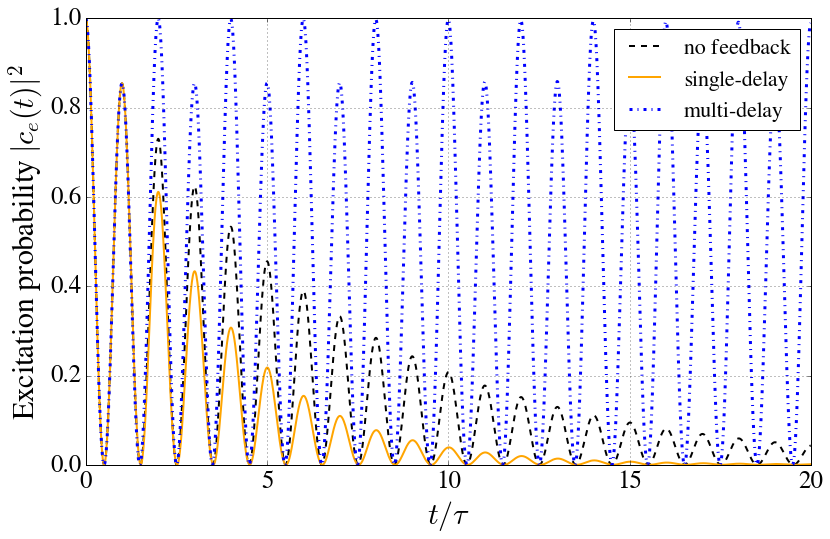

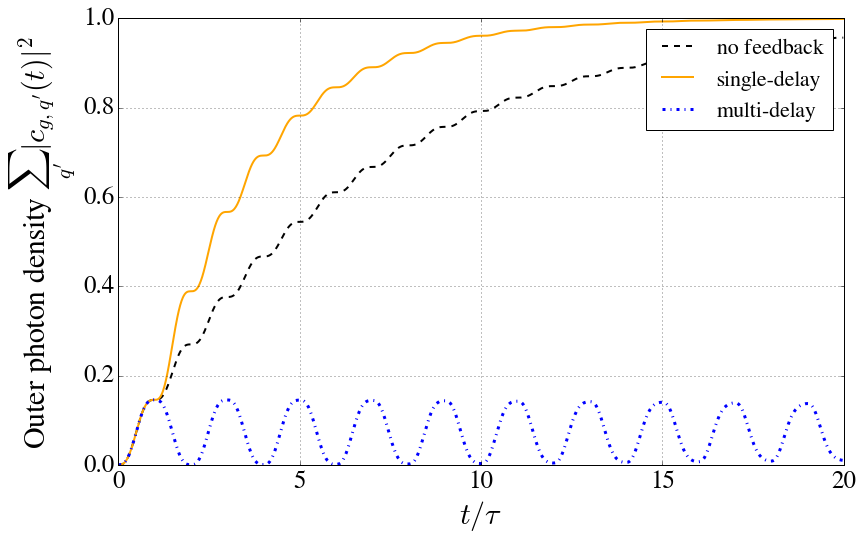

In [52]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=25)
mpl.rc('ytick',labelsize=25)

sol1 = ddeST1.sample(0,20*paramsST['tau'],0.001)
tST1  = sol1['t']/paramsST['tau']
ceST1 = sol1['ce']
cgST1 = sol1['cg']
solnofb = ddeSTnofb.sample(0,20*paramsST['tau'],0.001)
tSTnofb  = solnofb['t']/paramsST['tau']
ceSTnofb = solnofb['ce']
cgSTnofb = solnofb['cg']
solmany = ddeSTmany.sample(0,20*paramsST['tau'],0.001)
tSTmany  = solmany['t']/paramsST['tau']
ceSTmany = solmany['ce']
cgSTmany = solmany['cg']

fsfont = {'fontname':'FreeSerif'}
plt.figure(1,figsize=(13,8))
plt.clf()
plt.plot(tSTnofb,np.abs(cgSTnofb)**2,linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.plot(tST1,np.abs(cgST1)**2,linewidth=2.0,label='single-delay',color = 'orange')
plt.plot(tSTmany,np.abs(cgSTmany)**2,linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
#plt.xlim(0,3)
plt.ylabel('Cavity photon density $|c_g(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
plt.grid(True)
plt.figure(2,figsize=(13,8))
plt.plot(tSTnofb,np.abs(ceSTnofb)**2,linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.ylim(0,1)
plt.plot(tST1,np.abs(ceST1)**2,linewidth=2.0,label='single-delay',color = 'orange')
plt.plot(tSTmany,np.abs(ceSTmany)**2,linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Excitation probability $|c_e(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.figure(3,figsize=(13,8))
plt.plot(tSTnofb,1-(np.abs(ceSTnofb)**2+np.abs(cgSTnofb)**2),linewidth=2.0,label='no feedback',color='k',ls='--')
plt.hold(True)
plt.ylim(0,1)
plt.plot(tST1,1-(np.abs(ceST1)**2+np.abs(cgST1)**2),linewidth=2.0,label='single-delay',color = 'orange')
plt.plot(tSTmany,1-(np.abs(ceSTmany)**2+np.abs(cgSTmany)**2),linewidth=3.0,label='multi-delay',color='b',ls='-.')
plt.xlabel('$t/\\tau$',fontsize=30.)
plt.ylabel('Outer photon density $\sum_{q^\prime}|c_{g,q^\prime}(t)|^2$',fontsize=30.)
plt.legend(loc='upper right',fontsize = 22)
#plt.xlim(0,3)
plt.grid(True)
plt.show()